<a href="https://www.kaggle.com/code/ssagar012/brain-tumor-detection-using-glcm-with-dt-lr-knn?scriptVersionId=107584832" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# End - to - End Brain Tumor Detection using `Computer Vision` and `Feature Extraction`
This notebook compares Two different approaches to Solve the Brain tumor detection Problem.

* 1. Mathematical Appraoch
Instead of feeding the image directly to the imagenet models, we identify various features within an image. We extract the feature data from an image and create a data frame that can be fed into binary classification algorithms like **SVM, KNN,Logistic Regressor and Random forest**.
    * The features can be extracted Using GLCM and other filters


* 2. Computer Vision 
In this approach we Directly feed the image into Computer Vision models Like **CNN, VGG19 or YOLO**

Image Classification Models can be found at https://tfhub.dev/s?module-type=image-classification

## 

# Mathematical Approach

In [1]:

import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'
from PIL import Image
from tqdm import tqdm

import os


# Workflow
1. Preprocessing &  Plot images
2. Convert images into desired shape and size and format. for a particular `Model`
3. Create Labels of Yes or no for Images as per ID
4. Train the model.
5. Make Prediction after Train Test Split
________________________________________
* 6. Transform images!!! 
* 7. Identify contours and make bounding boxes.
* 8. feed bounding boxes to another model.
* 9. find Similarity index.
* 10. Check accuracy and precision.

____________________________

###  Details of Workflow
1. Preprocessing &  Plot images : 
`Resize, reshape and convert into grayscale and save accordingly.`

2. Use *GLCM* to identify features
3. Create Labels of Yes or no for Images as per ID
4. Train the model.
5. Make Prediction after Train Test Split

In [2]:
fno=[]
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'):
    for filename in filenames:
        a= os.path.join(dirname, filename)
        fno.append(a)
len(fno),fno[1]        

(98, '/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG')

In [3]:
fyes=[]
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'):
    for filename in filenames:
        a= os.path.join(dirname, filename)
        fyes.append(a)
len(fyes),fyes[1]        

(155, '/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y192.JPG')

# Create a data Frame with File paths and labels
* 1 --> Yes (Presence of Tumor)
* 0 --> No (Absence of tumor)

In [4]:
z = [0]* len(fno)
one = [1]*len(fyes)


In [5]:
dfn = pd.DataFrame(list(zip(fno,z )),
               columns =['filepath', 'label'])
dfy = pd.DataFrame(list(zip(fyes,one )),
               columns =['filepath', 'label'])

df = dfn.append(dfy,ignore_index = True )
df.head()

,filepath,label
0,/kaggle/input/brain-mri-images-for-brain-tumor...,0
1,/kaggle/input/brain-mri-images-for-brain-tumor...,0
2,/kaggle/input/brain-mri-images-for-brain-tumor...,0
3,/kaggle/input/brain-mri-images-for-brain-tumor...,0
4,/kaggle/input/brain-mri-images-for-brain-tumor...,0


## Creating a shuffeled Data Frame
#####dfs = df.sample(frac=1,ignore_index = True)


#######dfs.head()

# Function to Resize all the images

In [6]:

img = Image.open(fno[2])
a = np.asarray(img)

df1 = []
for r in range (len(fno)):
    img = Image.open(fno[r])
    img= img.resize((224,224))
    a=np.asarray(img)
    df1.append(a)
    
for r in range(len(fyes)):
    img=Image.open(fyes[r])
    img=img.resize((224,224))
    a= np.asarray(img)
    df1.append(a)
    
df["Imagearr"] = df1

### Converting Image from BRG to Gray

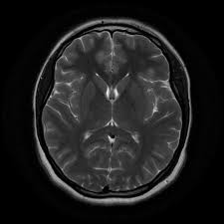

In [7]:
import cv2
o = df.Imagearr[3]
og = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
Image.fromarray(o)

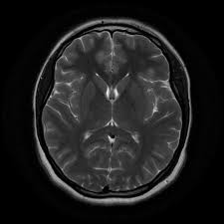

In [8]:
Image.fromarray(o)

In [9]:
# Be carefull Run only once

df["GLCM-Contrast-1"] = ''
df["GLCM-Contrast-2"] = ''
df["GLCM-Contrast-3"] = ''
df["GLCM-Contrast-4"] = ''

df["GLCM-Dissimilarity-1"] =''
df["GLCM-Dissimilarity-2"] =''
df["GLCM-Dissimilarity-3"] =''
df["GLCM-Dissimilarity-4"] =''
    
df["GLCM-Homogeneity-1"]=''
df["GLCM-Homogeneity-2"]=''
df["GLCM-Homogeneity-3"]=''
df["GLCM-Homogeneity-4"]=''
    
df["GLCM-Energy-1"]=''
df["GLCM-Energy-2"]=''
df["GLCM-Energy-3"]=''
df["GLCM-Energy-4"]=''

df["GLCM-Correlation-1"] =''
df["GLCM-Correlation-2"] =''
df["GLCM-Correlation-3"] =''
df["GLCM-Correlation-4"] =''

df["GLCM-ASM-1"]=''
df["GLCM-ASM-2"]=''
df["GLCM-ASM-3"]=''
df["GLCM-ASM-4"]=''

    

In [10]:
df.head()

,filepath,label,Imagearr,GLCM-Contrast-1,GLCM-Contrast-2,GLCM-Contrast-3,GLCM-Contrast-4,GLCM-Dissimilarity-1,GLCM-Dissimilarity-2,GLCM-Dissimilarity-3,...,GLCM-Energy-3,GLCM-Energy-4,GLCM-Correlation-1,GLCM-Correlation-2,GLCM-Correlation-3,GLCM-Correlation-4,GLCM-ASM-1,GLCM-ASM-2,GLCM-ASM-3,GLCM-ASM-4
0,/kaggle/input/brain-mri-images-for-brain-tumor...,0,"[[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], ...",,,,,,,,...,,,,,,,,,,
1,/kaggle/input/brain-mri-images-for-brain-tumor...,0,"[[[11, 11, 11], [11, 11, 11], [11, 11, 11], [1...",,,,,,,,...,,,,,,,,,,
2,/kaggle/input/brain-mri-images-for-brain-tumor...,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",,,,,,,,...,,,,,,,,,,
3,/kaggle/input/brain-mri-images-for-brain-tumor...,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",,,,,,,,...,,,,,,,,,,
4,/kaggle/input/brain-mri-images-for-brain-tumor...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",,,,,,,,...,,,,,,,,,,


# GLCM
A statistical method of examining texture that considers the spatial relationship of pixels is the gray-level co-occurrence matrix (GLCM), also known as the gray-level spatial dependence matrix. The GLCM functions characterize the texture of an image by calculating how often pairs of pixel with specific values and in a specified spatial relationship occur in an image, creating a GLCM, and then extracting statistical measures from this matrix. (The texture filter functions, described in Calculate Statistical Measures of Texture cannot provide information about shape, that is, the spatial relationships of pixels in an image.)

After you create the GLCMs using graycomatrix, you can derive several statistics from them using graycoprops. These statistics provide information about the texture of an image.

* **greycomatrix** - calculate the grey-level co-occurrence matrix
* **greycoprops** - calculate texture properties of a GLCM

Texture properties can be 
1. **Contrast** - Measures the local variations in the gray-level co-occurrence matrix.

2. **Correlation** - Measures the joint probability occurrence of the specified pixel pairs.

3. **Energy** - Provides the sum of squared elements in the GLCM. Also known as uniformity or the angular second moment.

4. **Homogeneity** - Measures the closeness of the distribution of elements in the GLCM to the GLCM diagonal.


## Overall function to add GLCM data to the data frame.

1. function takes image arrage as an input
2. the image is converted into gray from BGR
3. this image is fed to the glcm function
4. outputs of the GLCM function are assigned to the columns of DF


In [11]:
def fxnglcm(img,i):
    from skimage.feature import greycomatrix,greycoprops
    import skimage.feature as feature


    graycom = feature.graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)


    c = feature.graycoprops(graycom, 'contrast')
    d = feature.graycoprops(graycom, 'dissimilarity')
    h = feature.graycoprops(graycom, 'homogeneity')
    e = feature.graycoprops(graycom, 'energy')
    corr = feature.graycoprops(graycom, 'correlation')
    ASM = feature.graycoprops(graycom, 'ASM')
    c = np.squeeze(c)
    d = np.squeeze(d)
    h = np.squeeze(h)
    e = np.squeeze(e)
    corr = np.squeeze(corr)
    asm = np.squeeze(ASM)
    
    df["GLCM-Contrast-1"][i] = c[0]
    df["GLCM-Contrast-2"][i] = c[1]
    df["GLCM-Contrast-3"][i] = c[2]
    df["GLCM-Contrast-4"][i] = c[3]

    df["GLCM-Dissimilarity-1"][i] =d[0]
    df["GLCM-Dissimilarity-2"][i] =d[1]
    df["GLCM-Dissimilarity-3"][i] =d[2]
    df["GLCM-Dissimilarity-4"][i] =d[3]
    
    df["GLCM-Homogeneity-1"][i] =h[0]
    df["GLCM-Homogeneity-2"][i]=h[1]
    df["GLCM-Homogeneity-3"][i] =h[2]
    df["GLCM-Homogeneity-4"][i] =h[3]
    
    df["GLCM-Energy-1"][i] =e[0]
    df["GLCM-Energy-2"][i] =e[1]
    df["GLCM-Energy-3"][i] =e[2]
    df["GLCM-Energy-4"][i] =e[3]

    df["GLCM-Correlation-1"][i] =corr[0]
    df["GLCM-Correlation-2"][i] =corr[1]
    df["GLCM-Correlation-3"][i] =corr[2]
    df["GLCM-Correlation-4"][i] =corr[3]

    df["GLCM-ASM-1"][i] =asm[0]
    df["GLCM-ASM-2"][i] =asm[1]
    df["GLCM-ASM-3"][i] =asm[2]
    df["GLCM-ASM-4"][i] =asm[3]
    
    
    
    return 


#### Overall function


In [12]:
def glcmfiller(imgarr,i):
    import cv2
    if imgarr.shape !=(224, 224):
        og = cv2.cvtColor(imgarr,cv2.COLOR_BGR2GRAY)
        fxnglcm(og,i)
    else:
        fxnglcm(imgarr,i)


    

In [13]:
for i in tqdm(range(253)):
    glcmfiller(df.loc[i,"Imagearr"],i)

100%|██████████| 253/253 [00:15<00:00, 16.75it/s]


In [14]:
df

,filepath,label,Imagearr,GLCM-Contrast-1,GLCM-Contrast-2,GLCM-Contrast-3,GLCM-Contrast-4,GLCM-Dissimilarity-1,GLCM-Dissimilarity-2,GLCM-Dissimilarity-3,...,GLCM-Energy-3,GLCM-Energy-4,GLCM-Correlation-1,GLCM-Correlation-2,GLCM-Correlation-3,GLCM-Correlation-4,GLCM-ASM-1,GLCM-ASM-2,GLCM-ASM-3,GLCM-ASM-4
0,/kaggle/input/brain-mri-images-for-brain-tumor...,0,"[[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], ...",172.488769,346.449637,178.182615,319.784492,7.102358,10.249915,7.127002,...,0.072927,0.067197,0.953348,0.906189,0.951762,0.913412,0.005745,0.004497,0.005318,0.004515
1,/kaggle/input/brain-mri-images-for-brain-tumor...,0,"[[[11, 11, 11], [11, 11, 11], [11, 11, 11], [1...",124.070908,211.801363,115.459581,220.11066,5.991672,7.948883,5.721553,...,0.087047,0.075722,0.967474,0.944369,0.969726,0.942186,0.007894,0.0058,0.007577,0.005734
2,/kaggle/input/brain-mri-images-for-brain-tumor...,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",414.070508,723.818939,421.65603,741.325866,8.900104,11.602928,8.389614,...,0.245766,0.237821,0.965868,0.940307,0.965259,0.938864,0.059251,0.056426,0.060401,0.056559
3,/kaggle/input/brain-mri-images-for-brain-tumor...,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",175.456518,283.181966,144.580958,283.802972,5.400625,7.135997,5.077434,...,0.23921,0.225123,0.932586,0.891347,0.944449,0.891109,0.0562,0.050747,0.057221,0.05068
4,/kaggle/input/brain-mri-images-for-brain-tumor...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",472.49009,769.850329,390.019218,774.856462,8.611367,11.021356,7.448671,...,0.424123,0.41856,0.957576,0.930938,0.964981,0.930489,0.180117,0.175,0.17988,0.175193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,/kaggle/input/brain-mri-images-for-brain-tumor...,1,"[[[57, 52, 48], [57, 52, 48], [57, 52, 48], [5...",182.575092,388.872911,246.856102,419.069014,7.298106,10.707575,8.351818,...,0.044524,0.039175,0.973483,0.943548,0.964173,0.93916,0.002255,0.001525,0.001982,0.001535
249,/kaggle/input/brain-mri-images-for-brain-tumor...,1,"[[235, 169, 171, 172, 171, 172, 172, 172, 172,...",599.307235,1081.985481,552.491852,1122.855959,7.99986,11.575942,7.506226,...,0.168519,0.155535,0.898036,0.812493,0.906825,0.805411,0.028924,0.024209,0.028399,0.024191
250,/kaggle/input/brain-mri-images-for-brain-tumor...,1,"[[[253, 253, 253], [255, 255, 255], [254, 254,...",371.28087,838.008546,476.614009,835.532446,6.85458,11.168433,7.070247,...,0.051177,0.042357,0.947665,0.877544,0.93282,0.877905,0.002891,0.001779,0.002619,0.001794
251,/kaggle/input/brain-mri-images-for-brain-tumor...,1,"[[[1, 1, 1], [1, 1, 1], [0, 0, 0], [1, 1, 1], ...",245.931815,477.388646,282.304853,432.469183,7.713645,10.513946,7.703195,...,0.085995,0.07644,0.942668,0.888696,0.934201,0.899168,0.0075,0.005727,0.007395,0.005843


## Exporting Data Frame to Excel

In [15]:
df.to_excel("./glcm.xlsx")

# Feature Detection 


### Entropy

In [16]:
import matplotlib.pyplot as plt

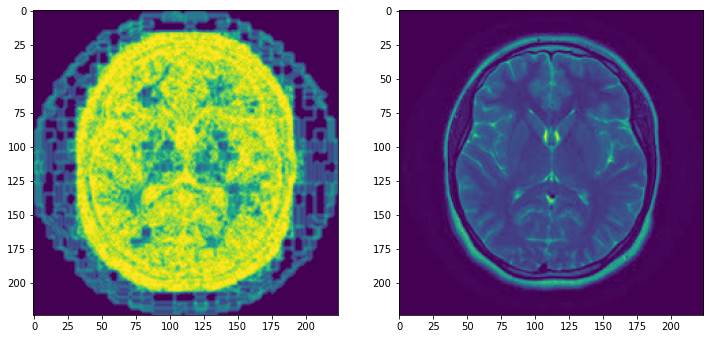

In [17]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

entropy_img = entropy(og,disk(2))

fig = plt.figure(figsize = (12,12)) 
ax1 = fig.add_subplot(121)# left side
ax2 = fig.add_subplot(122)

ax1.imshow(entropy_img)
ax2.imshow(og)
plt.show()

### Gaussian Filter
Basically Blurs the image

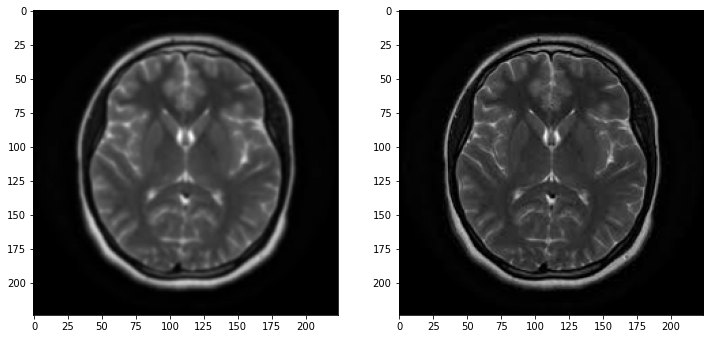

In [18]:
from scipy import ndimage as nd
from scipy import misc

fig = plt.figure(figsize = (12,12))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121) # On the Left
ax2 = fig.add_subplot(122) # Right Side
gaussian_img = nd.gaussian_filter(og,sigma = 1)
ax1.imshow(gaussian_img)
ax2.imshow(og)
plt.show()


### Sobel Filter

Helps to enhance the edges

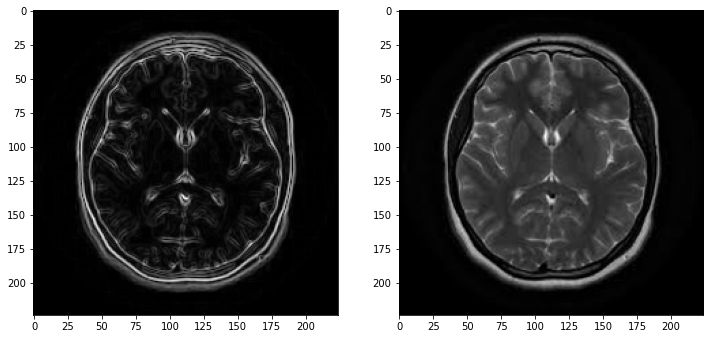

In [19]:
from skimage.filters import sobel

sobel_img = sobel(og)

fig = plt.figure(figsize = (12,12))
  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)# left side
ax2 = fig.add_subplot(122)

ax1.imshow(sobel_img)
ax2.imshow(og)
plt.show()

### Laplace Filter

<function matplotlib.pyplot.show(close=None, block=None)>

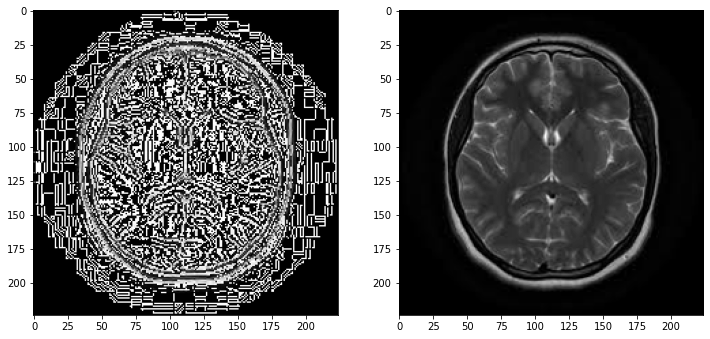

In [20]:
from scipy.ndimage import laplace

laplace_img = laplace(og)
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(laplace_img)
ax2.imshow(og)
plt.show

### Gabor Filter
Gabor filter is a linear filter with a Gaussian kernel which is modulated by a sinusoidal plane wave. Frequency and orientation representations of the Gabor filter are similar to those of the human visual system. Gabor filter banks are commonly used in computer vision and image processing. They are especially suitable for edge detection and texture classification.

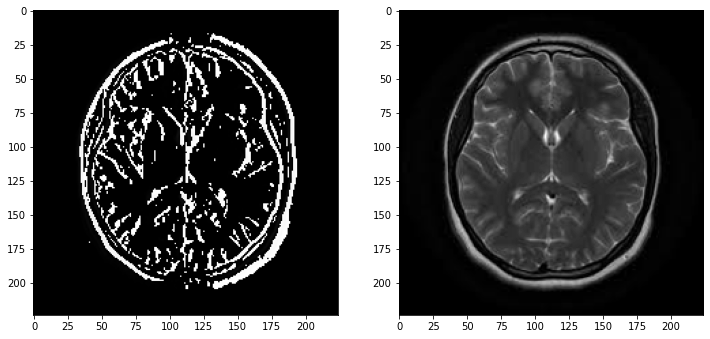

In [21]:
from skimage.filters import gabor
from skimage import io

real,gabor_img = gabor(og,frequency = 0.9)

fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(gabor_img)
ax2.imshow(og)

plt.show()


### Hessian
Filter an image with the Hybrid Hessian filter.

This filter can be used to detect continuous edges, e.g. vessels, wrinkles, rivers. It can be used to calculate the fraction of the whole image containing such objects.

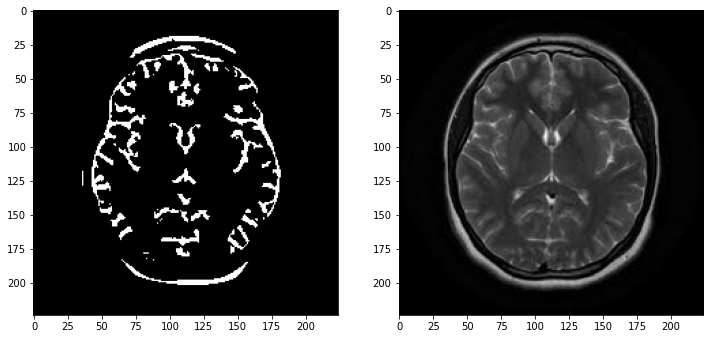

In [22]:
from skimage.filters import hessian

hessian_img = hessian(og,sigmas = range(1,100,1))
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(hessian_img)
ax2.imshow(og)

plt.show()

### Prewitt
Find the edge magnitude using the Prewitt transform.

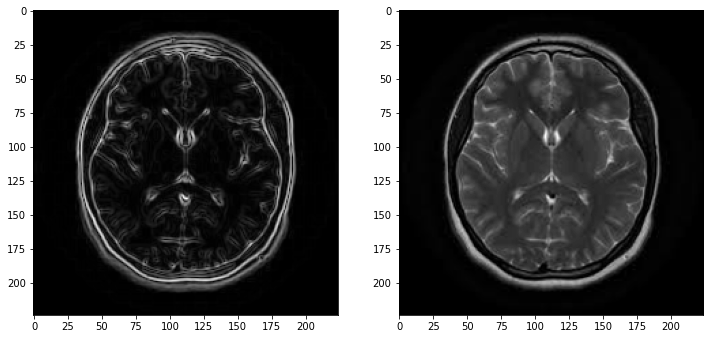

In [23]:
from skimage.filters import prewitt

prewitt_img = prewitt(og)
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(prewitt_img)
ax2.imshow(og)

plt.show()

## Working with Mathematical Models

In [24]:
import seaborn as sns
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


In [25]:
df = df.drop(["Imagearr","filepath"],axis = 1)
df = df.sample(frac=0.6,ignore_index = True,random_state=27)
y = df.label
df = df.drop("label",axis =1)

print(y.head(1))
df.head(1)


0    1
Name: label, dtype: int64


,GLCM-Contrast-1,GLCM-Contrast-2,GLCM-Contrast-3,GLCM-Contrast-4,GLCM-Dissimilarity-1,GLCM-Dissimilarity-2,GLCM-Dissimilarity-3,GLCM-Dissimilarity-4,GLCM-Homogeneity-1,GLCM-Homogeneity-2,...,GLCM-Energy-3,GLCM-Energy-4,GLCM-Correlation-1,GLCM-Correlation-2,GLCM-Correlation-3,GLCM-Correlation-4,GLCM-ASM-1,GLCM-ASM-2,GLCM-ASM-3,GLCM-ASM-4
0,396.38505,740.133242,413.582679,697.17901,9.873799,13.515936,10.011411,13.024573,0.253747,0.211918,...,0.068495,0.062876,0.958201,0.92188,0.956385,0.926414,0.005109,0.003983,0.004692,0.003953


In [26]:
X = df


In [27]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((121, 24), (121,), (31, 24), (31,))

## Logistic Regression

In [29]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs','saga'], 'max_iter':[50000]}# l1 lasso l2 ridge
lr=LogisticRegression()

In [30]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 50000, 'penalty': 'l2', 'solver': 'saga'}
accuracy : 0.7269230769230769


In [31]:
yhat=logreg_cv.predict(X_test)
logreg_cv.score(X_test, y_test)

0.7419354838709677

In [32]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No Tumor', 'Tumor Detected']); ax.yaxis.set_ticklabels(['No Tumor', 'Tumor Detected'])

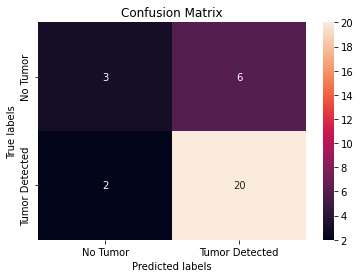

In [33]:
plot_confusion_matrix(y_test,yhat)

## K - Nearest Neighbours



In [34]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [35]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 0.6532051282051281


In [36]:
knn_cv.score(X_test, y_test)

0.7741935483870968

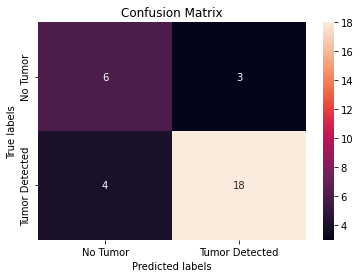

In [37]:
yhat=knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## Decision Tree

In [38]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [39]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8012820512820513


In [40]:

tree_cv.score(X_test,y_test)

0.7096774193548387

In [41]:
d = {"Logistic Regression" : logreg_cv.score(X_test, y_test)}